# Research Statement
The notebook scraps the data from English Premier league from season 2014 to present and uses the data to understand the impact of no fans in the stadium on the match results and other statistics for home side


##What is your project topic ? Briefly summarize what you are trying to eastablish?

The project explores the recent changes in the world of european football (soccer) specially English Premier league. Since the pandemic resumption of EPL, I have observed weird results in the EPL, I want to explore why the results have been so awkward. My hypothesis is to find the root cause of the problem and explore it in statistically significant results.



##What were the "results" of your work?

So after intiating a topic, I hypthesized that the factor that can cause major changes in the post pandemic EPL are lack of fans in the stadium. Since football is attributed to a home advantage sport, I wanted to study the performance of home teams in the post pandemic world as compared to previous season. The results were pretty stark,  I saw home teams in current season are having win probability of 0.11 less as compared to previous seasons.

Then I hypothesized the two cause of less win probability, xG and Chances missed. Since xG is high as a result of combination of both teams performance but chances missed of home team only is coming from poor performance from home team. So studyig these two can conclude if performance of home team is degraded or away teams are doing well.

From results, we see xG have gone down by 0.2 goals per match for home teams, it means that away teams are more confident and are not giving chances to home teams. Since chances missed is not statistically significant, we assume that there is not change in chances missed by home teams.


##What would be the next logical step in this exploration ?
Since we are attributing the decrease in win probability of home teams to improvement in performance of away teams, we should see the x,y coordinates of away teams and understand the average positions a player is playing to see what has changed. If the away team are more confident then we can see them up high the pitch with more posession in final third and more goals.

##What did you find difficult during the project ?
I found the data gathering part very difficult, I believe football has so many statistics attached to it. Finding the right set of data for analysis was very critical and therefore answering the questions which we seek to answer.

##What topic did you wish you were more knowledgable about/ what would have been handy to know while you were doing the project ?
I think the topic that I would have loved to know during all this is to know more about x,y coordinates of player position. Since Soccer is very strategic and every player is assigned a role and therefore understanding each player role x,y coordinate can tell me what role a player is playing and then the overall strategy of a team. If the data was also there for x,y coordinates of player before and after the pandemic, then we could have explored more about the strategic changes post pandemic.




**Data Gathering web scrapping**


In [17]:
import requests
from bs4 import BeautifulSoup 
import json
import pandas as pd
import os

In [18]:
base_url = 'https://understat.com/league/EPL/'


In [19]:
years = ['2014', '2015', '2016', '2017', '2018','2019','2020']


In [20]:
#I am using the script available on kaggle to scrap the dataset. Since the format of the data is not to my liking so I am modifying the existing scripts
## source- https://www.kaggle.com/abrarhossainhimself/understat-data-for-teams-players-2014-present
def season(year):
  season=year
  url = base_url + str(year)
  res = requests.get(url)
  soup = BeautifulSoup(res.content, 'lxml')
  script = soup.find_all('script')
  string_with_json_obj = ''
  for el in script:
        if 'teamsData' in el.text:
            string_with_json_obj = el.text.strip()
  ind_start = string_with_json_obj.index("('") + 2
  ind_end = string_with_json_obj.index("')") 
  json_data = string_with_json_obj[ind_start: ind_end]
  json_data = json_data.encode('utf8').decode('unicode_escape')
  data = json.loads(json_data)
  teams ={}
  for id in data.keys():
    teams[id] = data[id]['title']
  columns = []
  values = []
  for id in data.keys():
      columns = list(data[id]['history'][0].keys())
      break
  all_team_dicts = {}
  for id, team in teams.items():
      teams_data = []
      for i in data[id]['history']:
          teams_data.append(list(i.values()))
      df = pd.DataFrame(teams_data, columns = columns)
      all_team_dicts[team] = df
  for team, df in all_team_dicts.items():
      all_team_dicts[team]['ppda_coef'] = all_team_dicts[team]['ppda'].apply(lambda x : x['att']/x['def'] if x['def'] != 0 else 0)
      all_team_dicts[team]['oppda_coef'] = all_team_dicts[team]['ppda_allowed'].apply(lambda x : x['att']/x['def'] if x['def'] != 0 else 0)
  cols = ['date','xG', 'xGA', 'npxG', 'npxGA', 'deep', 'deep_allowed', 'scored', 'missed', 'xpts', 'wins', 'draws', 'loses', 'pts', 'npxGD','h_a','ppda_coef', 'oppda_coef']
  results = []
  for team, df in all_team_dicts.items():
      data = pd.DataFrame(df[cols]) 
      data['team'] = team
      data['matches'] = len(df)
      results.append(data)
  new=pd.DataFrame(results[0])
  for i in range(1,20):
    new=pd.concat([new,results[i]],axis=0)
  return new



In [21]:
data_2014=season(2014)
data_2015=season(2015)
data_2016=season(2016)
data_2017=season(2017)
data_2018=season(2018)
data_2019=season(2019)
data_2020=season(2020)

In [22]:
pre_covid=data_2019[data_2019['date']<='2020-04-01 17:00:00']
post_covid=data_2019[data_2019['date']>='2020-04-01 17:00:00']

In [23]:
pre_covid.groupby('h_a').mean()[['wins','draws','loses']]

,wins,draws,loses
h_a,,,
a,0.302083,0.25,0.447917
h,0.447917,0.25,0.302083


**Visualizations**

The visulizations here are to explore the impact of covid and subsequently no fans in the stadium for football matches in English Premier League.  The following graph tells how the fraction of matches won by home team have changes over the seasons

In [24]:
import matplotlib.pyplot as plt

bar1=data_2014.groupby('h_a').mean()[['wins','draws','loses']]
bar1.index=['Away','Home_2014']
bar1=bar1.loc['Home_2014']
bar2=data_2015.groupby('h_a').mean()[['wins','draws','loses']]
bar2.index=['Away','Home_2015']
bar2=bar2.loc['Home_2015']
bar3=data_2016.groupby('h_a').mean()[['wins','draws','loses']]
bar3.index=['Away','Home_2016']
bar3=bar3.loc['Home_2016']
bar4=data_2017.groupby('h_a').mean()[['wins','draws','loses']]
bar4.index=['Away','Home_2017']
bar4=bar4.loc['Home_2017']
bar5=data_2018.groupby('h_a').mean()[['wins','draws','loses']]
bar5.index=['Away','Home_2018']
bar5=bar5.loc['Home_2018']
bar6=pre_covid.groupby('h_a').mean()[['wins','draws','loses']]
bar6.index=['Away','Home_2019']
bar6=bar6.loc['Home_2019']
bar7=post_covid.groupby('h_a').mean()[['wins','draws','loses']]
bar7.index=['Away','Home_post_covid']
bar7=bar7.loc['Home_post_covid']
bar8=data_2020.groupby('h_a').mean()[['wins','draws','loses']]
bar8.index=['Away','Home_2020']
bar8=bar8.loc['Home_2020']

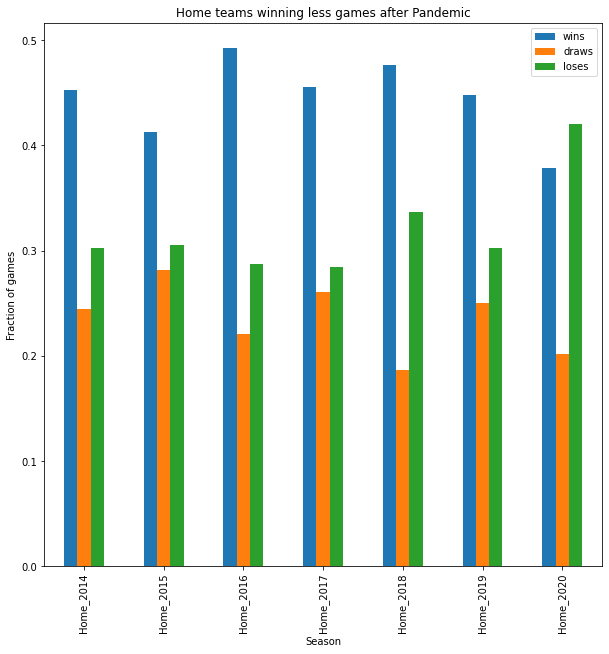

In [25]:
bars=pd.concat([bar1,bar2,bar3,bar4,bar5,bar6,bar8],axis=1)
bars=bars.T
bars.plot(kind='bar', figsize=(10,10))
plt.title("Home teams winning less games after Pandemic")
plt.ylabel("Fraction of games")
plt.xlabel("Season")
plt.show()

**We see an increase in losses for the home team for the 2020 season (season with no fans)**

 The following graph tells how the home teams have missed more chances in the current season as compared to previous

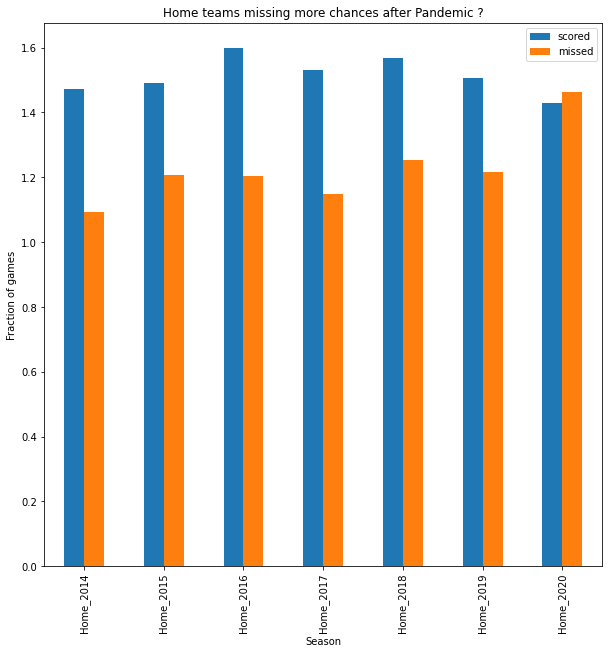

In [26]:
import matplotlib.pyplot as plt

bar1=data_2014.groupby('h_a').mean()[['scored','missed' ]]
bar1.index=['Away','Home_2014']
bar1=bar1.loc['Home_2014']
bar2=data_2015.groupby('h_a').mean()[['scored','missed' ]]
bar2.index=['Away','Home_2015']
bar2=bar2.loc['Home_2015']
bar3=data_2016.groupby('h_a').mean()[['scored','missed' ]]
bar3.index=['Away','Home_2016']
bar3=bar3.loc['Home_2016']
bar4=data_2017.groupby('h_a').mean()[['scored','missed' ]]
bar4.index=['Away','Home_2017']
bar4=bar4.loc['Home_2017']
bar5=data_2018.groupby('h_a').mean()[['scored','missed' ]]
bar5.index=['Away','Home_2018']
bar5=bar5.loc['Home_2018']
bar6=pre_covid.groupby('h_a').mean()[['scored','missed' ]]
bar6.index=['Away','Home_2019']
bar6=bar6.loc['Home_2019']
bar7=post_covid.groupby('h_a').mean()[['scored','missed' ]]
bar7.index=['Away','Home_post_covid']
bar7=bar7.loc['Home_post_covid']
bar8=data_2020.groupby('h_a').mean()[['scored','missed' ]]
bar8.index=['Away','Home_2020']
bar8=bar8.loc['Home_2020']
bars=pd.concat([bar1,bar2,bar3,bar4,bar5,bar6,bar8],axis=1)
bars=bars.T
bars.plot(kind='bar', figsize=(10,10))
plt.title("Home teams missing more chances after Pandemic ?")
plt.ylabel("Fraction of games")
plt.xlabel("Season")
plt.show()

**Home team are missing more chances in 2020 season**

 The following graph tells how the away teams have scored more goals in the current season the previous seasons 

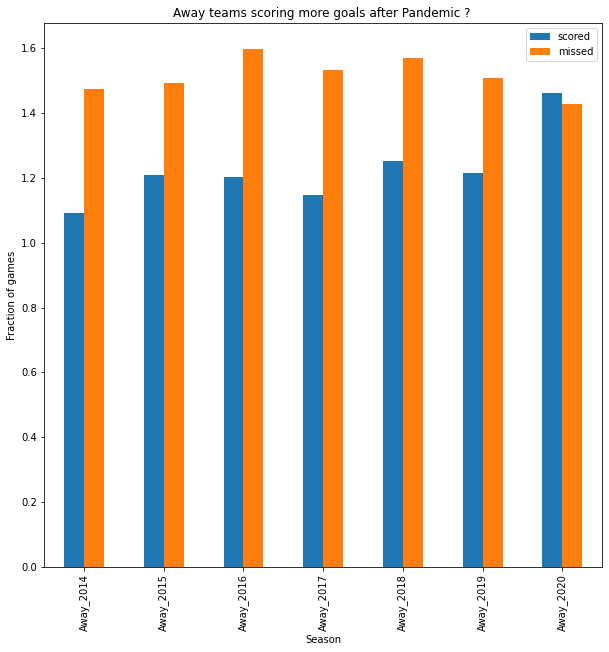

In [27]:
import matplotlib.pyplot as plt

bar1=data_2014.groupby('h_a').mean()[['scored','missed' ]]
bar1.index=['Away_2014','Home_2014']
bar1=bar1.loc['Away_2014']
bar2=data_2015.groupby('h_a').mean()[['scored','missed' ]]
bar2.index=['Away_2015','Home_2015']
bar2=bar2.loc['Away_2015']
bar3=data_2016.groupby('h_a').mean()[['scored','missed' ]]
bar3.index=['Away_2016','Home_2016']
bar3=bar3.loc['Away_2016']
bar4=data_2017.groupby('h_a').mean()[['scored','missed' ]]
bar4.index=['Away_2017','Home_2017']
bar4=bar4.loc['Away_2017']
bar5=data_2018.groupby('h_a').mean()[['scored','missed' ]]
bar5.index=['Away_2018','Home_2018']
bar5=bar5.loc['Away_2018']
bar6=pre_covid.groupby('h_a').mean()[['scored','missed' ]]
bar6.index=['Away_2019','Home_2019']
bar6=bar6.loc['Away_2019']
bar7=post_covid.groupby('h_a').mean()[['scored','missed' ]]
bar7.index=['Away_post_covid','Home_post_covid']
bar7=bar7.loc['Away_post_covid']
bar8=data_2020.groupby('h_a').mean()[['scored','missed' ]]
bar8.index=['Away_2020','Home_2020']
bar8=bar8.loc['Away_2020']
bars=pd.concat([bar1,bar2,bar3,bar4,bar5,bar6,bar8],axis=1)
bars=bars.T
bars.plot(kind='bar', figsize=(10,10))
plt.title("Away teams scoring more goals after Pandemic ? ")
plt.ylabel("Fraction of games")
plt.xlabel("Season")
plt.show()

**Away teams are scoring more.. Home advantage drifting off in 2020 season ?**

# Model Assumptions and Approach

In previous visuals we see some abnormalities in the 2020 season as compared to other seasons, however, we are still not certain if the abnormalities are actualy because of a reason or just some noise in data. To make good conclusion, I will use A/B test with difference in Difference (diff in diff) approach.

A diff in diff approach is nothing but finding the impact due to a change. For example since our 2020 teams are pretty same as seasons before therefore the number of goals scored per game in entire season can be assumed to be similar to previous seasons, but if we observe a major change (statistically significant) we will attribute the change to weird 2020 season itself and not any noise in the data.

The impact can be calulated using regression with interaction effect. Interection effect is combination of home/away and pre/post which is actually diff in diff in A/B testing. So running a regression with interaction effect and obtaining coefficient with statistically significant p-value can tell us if the change was due to 2020 season or some noise.


So exploration is done to check if Home teams are doing poor or away teams are doing well


1.   xG of home teams (if it goes down then away teams are defending well and making sure home teams are not getting chances to score )
2.   Missed chances of home teams (If it goes up then it means that Home teams are not finishing well and their performance is dropped down.





# Win ratio of Home teams A/B **test**

***Now lets see the impact of the no fans in win percentages by home team, Our Null hypothesis is that the win percentage change after no fans is 0, and alternate hypothesis is that win percentage change is less than zero (it means home teams are losing more matches than before )***

In [28]:
all=pd.concat([data_2014,data_2015,data_2016,data_2017,data_2018,data_2019,data_2020],axis=0)

In [29]:
all['pre/post']=1*(all['date']>='2020-04-01 17:00:00')


In [30]:
y=all['wins']
x=all.drop(columns=['date','scored','missed','xpts','wins','draws','loses','pts','team','matches','xG','npxG','deep_allowed'
,'xGA','npxGA','deep','npxGD','ppda_coef','oppda_coef'])
x['h_a']=1*(x['h_a']=='h')



In [31]:
x['interaction']=x['h_a']*x['pre/post']


In [32]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     37.70
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           4.47e-24
Time:                        07:08:47   Log-Likelihood:                -3287.0
No. Observations:                4798   AIC:                             6582.
Df Residuals:                    4794   BIC:                             6608.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3030      0.010     29.514      

Here we clearly see that the interaction effect, (diff in diff) of matches played by home team are affected a lot, roughly 0.11 win probability of home teams is decreased

# Expected Goals A/B test

**Now lets see how the expected goals have been impacted by the no fans in stadium and if they are statistically significant**

In [34]:
y=all['xG']
x=all.drop(columns=['date','scored','missed','xpts','wins','draws','loses','pts','team','matches','xG','npxG','deep_allowed'
,'xGA','npxGA','deep','npxGD','ppda_coef','oppda_coef'])
x['h_a']=1*(x['h_a']=='h')
x['interaction']=x['h_a']*x['pre/post']

x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     xG   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     60.08
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           4.00e-38
Time:                        07:09:02   Log-Likelihood:                -5856.7
No. Observations:                4798   AIC:                         1.172e+04
Df Residuals:                    4794   BIC:                         1.175e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1713      0.018     66.778      

Here we clearly see that the interaction effect, (diff in diff) of xG for home teams is decreased by 0.21 goals per match, the p value is 0.01 so the result holds 99% of the time and we can say the pandemic has effected xG as well

# Goals missed by home teams A/B test

**Goals missed by home teams is now studied next, here we see the test that what is the missed chances by home teams in previous season to current season**

In [35]:
y=all['missed']
x=all.drop(columns=['date','scored','missed','xpts','wins','draws','loses','pts','team','matches','xG','npxG','deep_allowed'
,'xGA','npxGA','deep','npxGD','ppda_coef','oppda_coef'])
x['h_a']=1*(x['h_a']=='h')
x['interaction']=x['h_a']*x['pre/post']

x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                 missed   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     28.94
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           1.55e-18
Time:                        07:09:09   Log-Likelihood:                -7823.7
No. Observations:                4798   AIC:                         1.566e+04
Df Residuals:                    4794   BIC:                         1.568e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.5293      0.026     57.862      

Here we see that the missed chances are 0.20 more per game by home team, however we don't have good p-value so we can't reject the null hypothesis that the missed chances are same as before.

# Summary

So our analysis understanding the impact of no fans in stadium started with analyzing the results of win probability of home teams before and after pandemic, we see that the win probability is decreased by 11 % for home teams. 

Then we try to understand the reasons behind less wins for home teams and we see that home teams are having less expected goals this season as compared to other seasons,  this can be attributed to no encouragement from fans to the home players. Also no fans in stadium promotes the performance of opponent players therefore home teams are not getting to the positions in the field as they used to be before. The results of xG are statistically significant therefore our null hypothesis is rejected.


Also we checked the missed chances by home teams, as the results are not statistically significant we can safely say that the decrease in win probability for home teams is attributed to less xG rather than missed chances. So basically home team performance is not decreased as much as away team performance has improved in the current season. Hence we see drop of win probability for home teams